In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [14]:
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()
## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
#est = sm.OLS(y, X).fit()
#est.summary()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


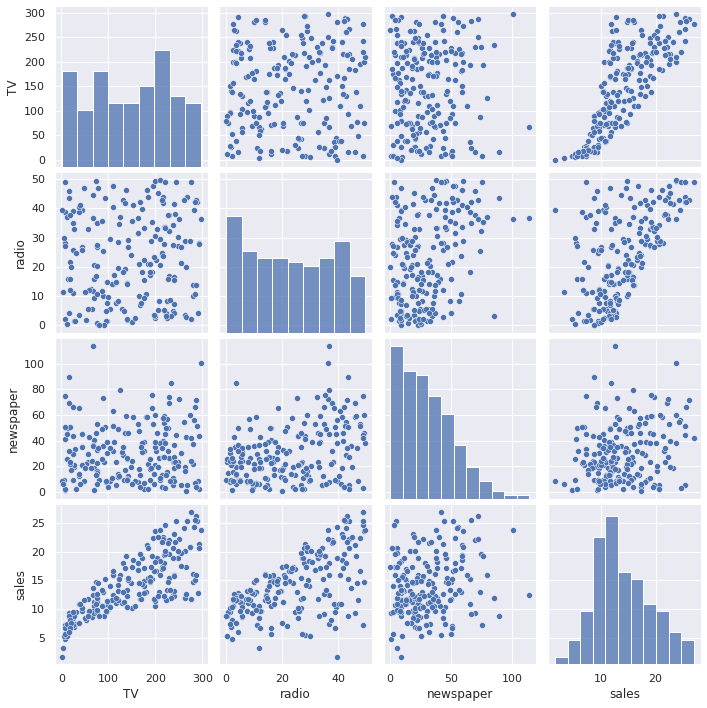

In [15]:
import seaborn as sns
sns.pairplot(df_adv)
plt.show()

/tmp/ipykernel_15152/3964663709.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


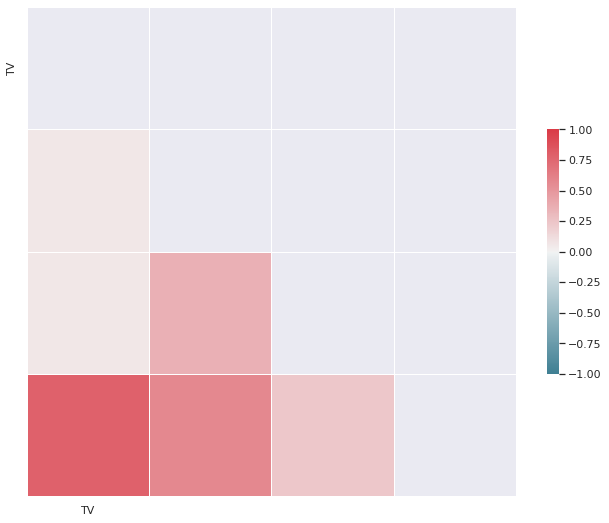

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
sns.set(style="darkgrid")

corr = df_adv.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# Zadanie 1
Wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.

Wykonaj kilka modeli i je porównaj.

In [17]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ radio + I(TV) + I(radio):I(TV) ', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.967    
Dependent Variable: sales            AIC:                548.2778 
Date:               2022-03-25 14:58 BIC:                561.4711 
No. Observations:   200              Log-Likelihood:     -270.14  
Df Model:           3                F-statistic:        1963.    
Df Residuals:       196              Prob (F-statistic): 6.68e-146
R-squared:          0.968            Scale:              0.89022  
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         6.7502    0.2479  27.2328  0.0000  6.2614  7.2391
radio             0.0289    0.0089   3.2408  0.0014  0.0113  0.0464
I(TV)             0.0191    0.0015  12.6990  0.0000  0.0161  0.0221
I(radio):I(TV)    0.0011    0.0001  20.7266  0.0000  0.0010  0.0012
------

In [6]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~   I(newspaper)*I(TV)   ', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.643    
Dependent Variable: sales            AIC:                1026.2452
Date:               2020-10-25 14:03 BIC:                1039.4385
No. Observations:   200              Log-Likelihood:     -509.12  
Df Model:           3                F-statistic:        120.6    
Df Residuals:       196              Prob (F-statistic): 2.84e-44 
R-squared:          0.649            Scale:              9.7138   
------------------------------------------------------------------
                      Coef.  Std.Err.   t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
Intercept             6.4042   0.7334 8.7324 0.0000  4.9579 7.8505
I(newspaper)          0.0241   0.0193 1.2511 0.2124 -0.0139 0.0621
I(TV)                 0.0427   0.0043 9.8965 0.0000  0.0342 0.0512
I(newspaper):I(TV)    0.0001   0.0001 1.2280 0.2209 -0.0001 0.0003
-------------

In [7]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~   I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2020-10-25 14:03   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [8]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~   I(TV):I(radio):I(newspaper**2 )', data=df_adv).fit()
print((est.summary2()))

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.324    
Dependent Variable:       sales                AIC:                    1152.0903
Date:                     2020-10-25 14:03     BIC:                    1158.6870
No. Observations:         200                  Log-Likelihood:         -574.05  
Df Model:                 1                    F-statistic:            96.33    
Df Residuals:             198                  Prob (F-statistic):     8.84e-19 
R-squared:                0.327                Scale:                  18.405   
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        12.5559   0.3382 37.1300 0.0000 11.8891 13.2228
I(TV):I(radio):I(newspaper ** 2)  0.0000   0.0000  9.

In [9]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~   I(newspaper) + I(TV):I(radio) + I(np.power(TV,2)):I(radio)  ', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.929    
Dependent Variable:     sales              AIC:                  701.9754 
Date:                   2020-10-25 14:03   BIC:                  715.1687 
No. Observations:       200                Log-Likelihood:       -346.99  
Df Model:               3                  F-statistic:          875.3    
Df Residuals:           196                Prob (F-statistic):   3.34e-113
R-squared:              0.931              Scale:                1.9198   
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    8.7715   0.1943 45.1406 0.0000  8.3883 9.1548
I(newspaper)                -0.0043   0.0047 -0.9226 0.3573 -0.0135 0.0049
I(TV):I(radio)               0.0017   0.0001 14

In [17]:
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~   np.log(newspaper+1) + I(TV):I(radio) + I(np.power(TV,2)):I(radio) + I(np.power(TV,5)):I(np.power(radio,2))  ', data=df_adv).fit()
print((est.summary2()))

                            Results: Ordinary least squares
Model:                       OLS                     Adj. R-squared:            0.791   
Dependent Variable:          sales                   AIC:                       919.3813
Date:                        2020-10-25 14:13        BIC:                       932.5746
No. Observations:            200                     Log-Likelihood:            -455.69 
Df Model:                    3                       F-statistic:               251.9   
Df Residuals:                196                     Prob (F-statistic):        5.69e-67
R-squared:                   0.794                   Scale:                     5.6930  
----------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------
Intercept                                 0.6353  

In [6]:
import statsmodels 
statsmodels.__version__ 

'0.8.0'

In [7]:
import pandas 
pandas.__version__ 

'0.23.3'